In [109]:
import pickle
import pandas as pd

import sys, os
from pathlib import Path
# signalfuncなどのある親ディレクトリのパスを取得,これはJupyter系特有の書き方
current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../')

from sklearn.preprocessing import StandardScaler

import ml_modules as mm

In [110]:
df_train_data = pd.read_csv('../data/wine_train.csv')
df_train_data = pd.get_dummies(df_train_data)

x = df_train_data[list(set(df_train_data.columns)-set(['type_W','type_R','quality','quality_range']))]
# y = df_train_data['quality_range']
y = df_train_data['quality']

In [111]:
df = pd.read_csv('../data/wine_test.csv')


In [112]:
del df['type']

In [115]:
filename = '../model/multico_voting_model.pickle'

In [116]:
with open(filename, mode='rb') as fp:
    voting = pickle.load(fp)

In [117]:
X_test = pd.read_csv('../data/X_test.csv', header=0, index_col=0)
y_test = pd.read_csv('../data/y_test.csv',names=('l'))

Model Performance metrics:
------------------------------
Accuracy:  65.55% 
Precision: 66.58% 
Recall:    65.55% 
F1 Score:  64.06% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.62      0.77      0.69       473
           7       0.69      0.47      0.56       200
           5       0.69      0.70      0.70       351
           8       0.92      0.34      0.50        32
           4       0.60      0.08      0.14        38
           3       1.00      0.17      0.29         6
           9       0.00      0.00      0.00         0

   micro avg       0.66      0.66      0.66      1100
   macro avg       0.65      0.36      0.41      1100
weighted avg       0.67      0.66      0.64      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        366  27   79   1  0  0  0
        7        1

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Zi/codes/Practice-ML/wine_quality/model/../ml_modules/output_resulsts.py:104: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  columns=pd.MultiIndex(levels=[['Predicted:'], target_names], labels=level_labels),
/Users/Zi/codes/Practice-ML/wine_quality/model/../ml_modules/output_resulsts.py:105: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  index=pd.MultiIndex(levels=[['Actual:'], target_names], labels=level_labe

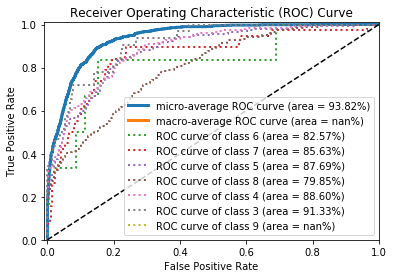

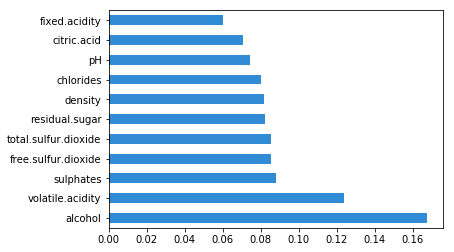

In [118]:
results = mm.get_results(voting
                         , 'voting_test2', X_test, y_test['l'], target_labels = y.unique(), target_names=[str(x) for x in y.unique()], reasume=True)

In [119]:
ss = StandardScaler()
df = pd.DataFrame(columns=df.columns,data=ss.fit_transform(df))

In [120]:
ans = pd.DataFrame(voting.predict(df), columns=['predict'])

In [121]:
ans_review = pd.DataFrame(ans['predict'].value_counts())

In [122]:
ans_review['per'] = ans_review['predict'] / 1000

In [123]:
ans_review

,predict,per
6,489,0.489
5,450,0.450
7,55,0.055
8,3,0.003
9,2,0.002
3,1,0.001


In [124]:
base = pd.DataFrame(df_train_data['quality'].value_counts())

In [125]:
base['per']=base['quality']/len(df_train_data)

In [126]:
base

,quality,per
6,2410,0.438421
5,1793,0.326178
7,910,0.165545
4,184,0.033473
8,170,0.030926
3,25,0.004548
9,5,0.000910


In [74]:
# ans.to_csv('multico_predict.csv')